## Time Series EDA
- Single continuous variable over (uniformly distributed) time
- Understand temporal behavior of data: trend and seasonality, cycle
- Identify underlying distribution and nature of temporal processes producing data

#### Setup
°F = (K - 273.15) x 1.8000 + 32.00

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [ ]:
# read csv file. Specify 'datetime' column as index column, parse dates and sort index

df = pd.read_csv('sa_temps.csv', index_col='datetime', parse_dates=True).sort_index()
df.temp = (df.temp - 273.15) * 1.8 + 32

print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

In [ ]:
df.head()

- **seasonality**: a repeated cycle in the data. Occurs at a fixed frequency. In our weather data there is yearly and daily seasonality  
    - Quite common in economic time series. It is less common in engineering and scientific data.
    - Can help us understand underlying dynamics


- **trend**: long term upwards or downwards movement  
- **cycle**: Some arbitrary chunk of time, usually longer than a season, or consists of multiple seasons

### Data Splitting

- Ideally all splits contain a season
- Human-based
- Percentage based
- Cross Validation

### Percentage-Based

In [ ]:
# check shape of data
df.shape

In [ ]:
# Lets use 70/30 train test split %

train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)
test_start_index

In [ ]:
# create train and test dataframe

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

In [ ]:
# lets plot train and test



### Human-Based

In [ ]:
# Anything upto (and including) 2016 as train and rest as test

train = df[:'2016'] # includes 2016
test = df['2017']

# plot the train and test


### Sklearn Cross-validation: 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

Visuals:
https://github.com/scikit-learn/scikit-learn/issues/14376

## Visualizations

In [ ]:
# we will do visualization on train only:


In [ ]:
# create a series called 'y'

y = train.temp
y.head()

### Don't consider the time series

In [ ]:
# plot a histogram of temperature


- by month
- by weekday

In [ ]:
y.index.month

In [ ]:
train['month'] = y.index.month

In [ ]:
# Plot mean temperature by month (bar plot)



In [ ]:
train['weekday'] = y.index.day_name()

In [ ]:
# Plot mean temperature by weekday



#### What if we want to visualize more than just the mean temperature?

In [ ]:
train.groupby('weekday').describe()

In [ ]:
sns.boxplot(data = train, x = 'weekday', y = 'temp')

In [ ]:
# Anything interesting in the chart above?

# Would the monthly boxplot look different?

### Visualize the target over time

In [ ]:
y.plot();

In [ ]:
y.resample('6H').mean().plot(title='6 hour average')

In [ ]:
y.resample('2W').mean().plot(title='2 week average');

In [ ]:
y.resample('M').mean().plot(label = 'Monthly')
y.resample('Y').mean().plot(label = 'Yearly')
plt.legend()

In [ ]:
y.resample('M').agg(['min', 'mean', 'max']).plot()


In [ ]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

In [ ]:
#### We can reduce noise by resampling data the data to longer frequencies.

##Seasonaility to Trend


In [ ]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

### Visualize change over time

In [ ]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in temperature')

In [ ]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in temperature')

### Seasonal Plot
- comparison of multiple years together.

In [ ]:
# unstack is similar to pivot_table. It turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()

### Seasonal Subseries Plot
A seasonal subseries plot shows the change year-over-year within each month.

In [ ]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

In [ ]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    x_left, x_right = ax.get_xlim()
    ax.hlines(subset.mean(), x_left, x_right, ls='--')
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

#### As with the monthly box plot, the seasonal pattern is quite evident in the seasonal subseries.

- Do the data exhibit a seasonal pattern?
- What is the nature of the seasonality?
- Is there a within-group pattern (e.g., do January and July exhibit similar patterns)?
- Are there any outliers once seasonality has been accounted for?

- Should I use box plot instead?

### What if seasonality is not that readily apparent?

Is there a seasonality in this data?

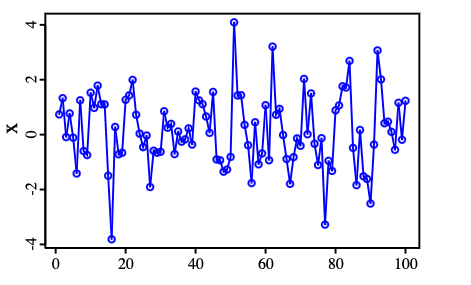

### Lag plot

In [ ]:
y.shift(-1)

In [ ]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y_t$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag = 1')

In [ ]:
daily = train.resample('D').mean()
daily['temp_next_day'] = daily.temp.shift(-1)
daily.plot.scatter(x='temp', y='temp_next_day')

In [ ]:
weekly = train.resample('W').mean()
weekly['temp_next_week'] = weekly.temp.shift(-1)

weekly

In [ ]:
weekly.plot.scatter(x='temp', y='temp_next_week')

In [ ]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.temp.shift(-12)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

In [ ]:
weekly = train.resample('W').mean()
weekly['26_weeks_out'] = weekly.temp.shift(-26)
weekly = weekly.rename(columns={'temp': 'this_week'})
weekly.plot.scatter(x='this_week', y='26_weeks_out')
weekly

In [ ]:
# easier way. Use pd.plotting.lag_plot(series, lag):

pd.plotting.lag_plot(train.temp.resample('W').mean(), lag=26)

### Autocorrelation Plot

In [ ]:
pd.plotting.autocorrelation_plot(train.temp.resample('W').mean())

### What does autocorrelation plot look like for white noise

In [ ]:
grid = np.linspace(0, 720, 500)
noise = np.random.rand(500)
# result_curve =  noise
plt.plot(grid, noise)

In [ ]:
from statsmodels.tsa import stattools

acf_result = stattools.acf(noise)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(noise)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(noise)),linestyle='--')

### Another example of Autocorrelation

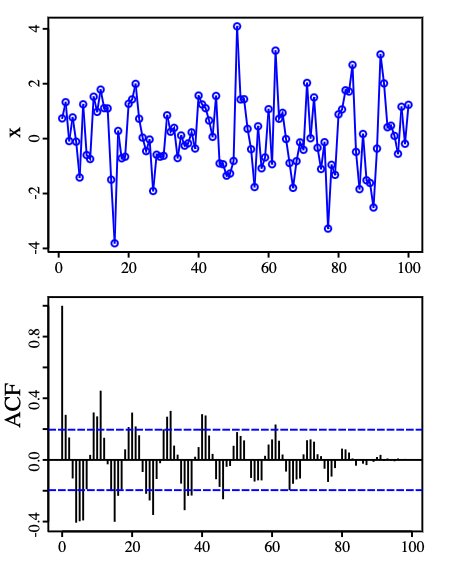

#### Visuals seasonal subseries plot and the box plot assume that the seasonal periods are known. However, if the seasonality period is not readlity apparent , the autocorrelation plot can help. 
#### If there is significant seasonality, the autocorrelation plot should show spikes at lags equal to the period.

### Seasonal Decomposition

$$ y = S + T + \epsilon $$

Seasonality + Trend + Residual

In [ ]:
y = train.temp.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
result

In [ ]:
result.seasonal

In [ ]:
# Make a dataframe:

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

In [ ]:
decomposition.iloc[:, 1:].plot()

In [ ]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

### Additive or multiplicative seasonality?


The additive model is most appropriate if the magnitude of the seasonal fluctuations or the variation around the trend-cycle does not vary with the level of the time series. When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative model is more appropriate. 


https://kourentzes.com/forecasting/2014/11/09/additive-and-multiplicative-seasonality/

### Categories over time

In [ ]:
train = train.resample('D').mean()
train.head()

In [ ]:
# create a categorical feature
train['temp_bin'] = pd.qcut(train.temp, 4, labels=['cold', 'cool', 'warm', 'hot'])
train.groupby('temp_bin').temp.mean()

How can we visualize the temp_bin feature over time?

In [ ]:
train.head()

In [ ]:
(train.groupby('temp_bin')
 .resample('M')
 .size() # like COUNT(*)
 .unstack(0) # turns an index level into columns
 .fillna(0)
 .astype(int)
 .apply(lambda row: row / row.sum(), axis=1) # raw nums to % of the row
 .plot.area()
)
plt.ylabel('% of days in the month')

In [ ]:
ax = (train['2015':'2016']
 .groupby('temp_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)

In [ ]:
# take the existing labels, convert them to Timestamps, and then reformat with .strftime
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels);

### strftime

In [ ]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()

In [ ]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0);

### Matplotlib Dates
This will only work with plt.plot or ax.plot, not with the pandas plotting!

In [ ]:
# how can i customize the x axis label here?

y.resample('W').mean().plot()

In [ ]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))